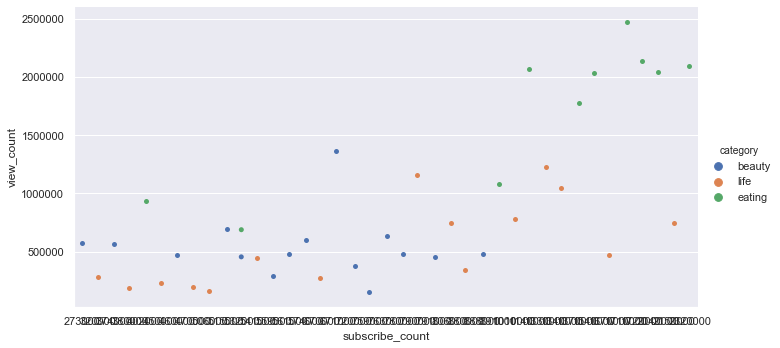

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("csv,xlsx파일 모음/"+"파뿌리.csv",encoding="utf-8")


mean_df = df.groupby([df["subscribe_count"]]).mean()
mean_df.head(15)

mean_df.index



import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

sub_cat_view = df.groupby(["subscribe_count","category"],as_index=False)["view_count"].mean()

# 경향성 시각화
sns.catplot(data=sub_cat_view,x="subscribe_count",y="view_count",hue="category",aspect=2)

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:

train_data = df.drop(["view_count","category"],axis=1)
target_data = df["view_count"]

In [4]:
train_data.head(15)

,thumbnail,title,likes_count,dislikes_count,upload_date,video_length,subscribe_count
0,0.0,1,160000,9000,16,19,1370000
1,0.5,1,150000,7500,16,12,1710000
2,0.0,3,100000,9400,16,11,1140000
3,0.0,1,82000,4300,16,11,1370000
4,0.0,3,110000,5900,16,9,1370000
5,0.5,1,84000,8100,13,16,402000
6,0.0,5,96000,3000,15,12,2040000
7,0.0,1,99000,5200,16,11,1140000
8,0.0,1,72000,6200,16,11,1140000
9,0.5,1,57000,3800,16,12,1710000


In [5]:
x_train,x_test,y_train,y_test = train_test_split(train_data,target_data)

In [6]:
from sklearn.ensemble import RandomForestRegressor

# 분야별로 경향이나 추이가 다르기 때문에 분야를 기준으로 데이터를 나누어야 한다. 

# beauty 
beauty_data = df[df["category"] == "beauty"]
train_data_beauty = beauty_data.drop(["view_count","category"],axis=1)
test_data_beauty = beauty_data["view_count"]

x_train_beauty, x_test_beauty,y_train_beauty,y_test_beauty = train_test_split(train_data_beauty,test_data_beauty)

# eating
eating_data = df[df["category"] == "eating"]
train_data_eating = eating_data.drop(["view_count","category"],axis=1)
test_data_eating = eating_data["view_count"]

x_train_eating,x_test_eating,y_train_eating,y_test_eating = train_test_split(train_data_eating,test_data_eating)

#life
life_data = df[df["category"] == "life"]
train_data_life = life_data.drop(["view_count","category"],axis=1)
test_data_life = life_data["view_count"]

x_train_life,x_test_life,y_train_life,y_test_life = train_test_split(train_data_life,test_data_life)


In [7]:

# LinearRegression
from sklearn.linear_model import LinearRegression

linear_beauty = LinearRegression().fit(x_train_beauty,y_train_beauty)
linear_eating = LinearRegression().fit(x_train_eating,y_train_eating)
linear_life = LinearRegression().fit(x_train_life,y_train_life)

print("Beauty(Linear) : ")
print("traing set accuracy : ",linear_beauty.score(x_train_beauty,y_train_beauty))
print("test set accuracy : ",linear_beauty.score(x_test_beauty,y_test_beauty))

print("Eating(Linear) : ")
print("traing set accuracy : ",linear_eating.score(x_train_eating,y_train_eating))
print("test set accuracy : ",linear_eating.score(x_test_eating,y_test_eating))

print("Life(Linear) : ")
print("traing set accuracy : ",linear_life.score(x_train_life,y_train_life))
print("test set accuracy : ",linear_life.score(x_test_life,y_test_life))
print()

# RandomForest
forest_beauty = RandomForestRegressor().fit(x_train_beauty,y_train_beauty)
forest_eating = RandomForestRegressor().fit(x_train_eating,y_train_eating)
forest_life = RandomForestRegressor().fit(x_train_life,y_train_life)

print("Beauty(RandomForest) : ")
print("traing set accuracy : ",forest_beauty.score(x_train_beauty,y_train_beauty))
print("test set accuracy : ",forest_beauty.score(x_test_beauty,y_test_beauty))

print("Eating(RandomForest) : ")
print("traing set accuracy : ",forest_eating.score(x_train_eating,y_train_eating))
print("test set accuracy : ",forest_eating.score(x_test_eating,y_test_eating))

print("Life(RandomForest) : ")
print("traing set accuracy : ",forest_life.score(x_train_life,y_train_life))
print("test set accuracy : ",forest_life.score(x_test_life,y_test_life))
print()

# Polynomial
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_beauty = make_pipeline(PolynomialFeatures(2),LinearRegression()).fit(x_train_beauty,y_train_beauty)
poly_eating = make_pipeline(PolynomialFeatures(2),LinearRegression()).fit(x_train_eating,y_train_eating)
poly_life = make_pipeline(PolynomialFeatures(2),LinearRegression()).fit(x_train_life,y_train_life)


print("Beauty(Polynomial) : ")
print("traing set accuracy : ",poly_beauty.score(x_train_beauty,y_train_beauty))
print("test set accuracy : ",poly_beauty.score(x_test_beauty,y_test_beauty))

print("Eating(Polynomial) : ")
print("traing set accuracy : ",poly_eating.score(x_train_eating,y_train_eating))
print("test set accuracy : ",poly_eating.score(x_test_eating,y_test_eating))

print("Life(Polynomial) : ")
print("traing set accuracy : ",poly_life.score(x_train_life,y_train_life))
print("test set accuracy : ",poly_life.score(x_test_life,y_test_life))
print()



new_data = pd.read_excel("csv,xlsx파일 모음/"+"all_new_data.xlsx")
new_x_test = new_data.drop(["category","view_count"],axis=1)
new_y_test = new_data["view_count"]

print("new data set accuracy (Linear): ", linear_beauty.score(new_x_test,new_y_test))
print("new data set accuracy (RandomForest): ", forest_beauty.score(new_x_test,new_y_test))
print("new data set accuracy (Polynomial): ", poly_beauty.score(new_x_test,new_y_test))

Beauty(Linear) : 
traing set accuracy :  0.8978844886532118
test set accuracy :  0.669103392006569
Eating(Linear) : 
traing set accuracy :  0.9045997131147179
test set accuracy :  0.8960173722680311
Life(Linear) : 
traing set accuracy :  0.769290875215132
test set accuracy :  0.7474995108719856

Beauty(RandomForest) : 
traing set accuracy :  0.9690442431070216
test set accuracy :  0.6527130927683851
Eating(RandomForest) : 
traing set accuracy :  0.957009506374674
test set accuracy :  0.877326944474151
Life(RandomForest) : 
traing set accuracy :  0.9578503508507538
test set accuracy :  0.7380178851571766

Beauty(Polynomial) : 
traing set accuracy :  0.937516733705474
test set accuracy :  0.007765889239806256
Eating(Polynomial) : 
traing set accuracy :  0.9636893618985916
test set accuracy :  0.8389058301200357
Life(Polynomial) : 
traing set accuracy :  0.8536113498180099
test set accuracy :  0.7422396749640001



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


new data set accuracy (Linear):  -2.8221688076465363
new data set accuracy (RandomForest):  0.6497215395106511
new data set accuracy (Polynomial):  -272.41514507936046


RandomForestRegressor를 사용하는것이 가장 무난하다.
왜냐하면 Polynomial은 new data에 대해 -의 정확도를 보이기 때문에 제외되고,
LinearRegression모델은 "일상" 데이터에 대해 (-)가 나오는 경우가 종종 있었다.
하지만 RandomForestRegressor는 (-)의 정확도가 나타나지 않았다.
